# 1. Time Series Classification

#### (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which con- tains 6 time series and each time series has 480 consecutive values.

#### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from astropy.table import Table
import os

#create a function to read csv and put them togather
def sep_dataset(count1,count2):
    df_sum = pd.DataFrame()
    for i in range(count1,count2+1,1):
        df = pd.read_csv('dataset%d.csv' %i, sep = ',', header = 4)
        #print(i)
        #print(df)
        df_sum = pd.concat( [df_sum, df], axis=0)
    return df_sum 


#load data files and seperate them into test and train dataset
os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/bending1')
bending1_test = sep_dataset(1,2)
bending1_train = sep_dataset(3,7)

#check each dataset's shape
print(bending1_test.shape)
print(bending1_train.shape)

os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/bending2')
bending2_test = sep_dataset(1,2)
bending2_train = sep_dataset(3,6).drop(columns = '# Columns:time')
print(bending2_test.shape)
print(bending2_train.shape)

os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/cycling')
cycling_test = sep_dataset(1,3)
cycling_train = sep_dataset(4,15)
print(cycling_test.shape)
print(cycling_train.shape)

os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/lying')
lying_test = sep_dataset(1,3)
lying_train = sep_dataset(4,15)
print(lying_test.shape)
print(lying_train.shape)

os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/sitting')
sitting_test = sep_dataset(1,3)
sitting_train = sep_dataset(4,15)
print(sitting_test.shape)
print(sitting_train.shape)

os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/standing')
standing_test = sep_dataset(1,3)
standing_train = sep_dataset(4,15)
print(standing_test.shape)
print(standing_train.shape)

os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/walking')
walking_test = sep_dataset(1,3)
walking_train = sep_dataset(4,15)
print(walking_test.shape)
print(walking_train.shape)
#bending1_test = bending1_test.fillna(0)



(960, 7)
(2400, 7)
(960, 7)
(1920, 7)
(1440, 7)
(5760, 7)
(1440, 7)
(5760, 7)
(1440, 7)
(5759, 7)
(1440, 7)
(5760, 7)
(1440, 7)
(5760, 7)


#### (c) Feature Extraction
##### &nbsp; Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

##### &nbsp; i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

&nbsp;Mean, Maximum, Minimum, Std, Median

##### &nbsp; ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from astropy.table import Table
import os


var_name = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

#calculate max, min, mean, median, std, first quantile and third quantile
def get_var_features(df,varname,features_list):
    features_list = list()
    max_v = df[varname].max()
    min_v = df[varname].min()
    mean_v = round(df[varname].mean(),2)
    median_v = round(df[varname].median(),2)
    std_v = round(df[varname].std(),2)
    quantile1_v = round(df[varname].quantile(.25),2)
    quantile3_v = round(df[varname].quantile(.75),2)
    features_list.extend((min_v,max_v,mean_v,median_v,std_v,quantile1_v,quantile3_v))
    return features_list

#get 6feautures from dataset
def get_features(name,count):
    df = pd.read_csv(name, sep = ',', header = 4)
    features_list = list()
    for i in var_name:
        list_1 = get_var_features(df,i,features_list)
        #print(list_1)
        features_list  +=  list_1
    features = list()
    features.append(features_list)
    return features


#load data files
def get_all(filename):
    os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    file_fea = list()
    b = os.listdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    if '.ipynb_checkpoints'in b:
        b.remove('.ipynb_checkpoints')
    for i in range(1,len(b)+1,1):
        a = get_features('dataset%d.csv' %i,i)
        
    #get_var_features('avg_rss12')
        file_fea.append(a[0])
    return file_fea

filename_list = ['bending1','bending2','cycling','lying','sitting','standing','walking']
features = list()
for i in filename_list:
    fea = get_all(i)
    features.append(fea)
    
f_list = list()
n = 0
for m in range(0,7,1):
    for j in features[m]:
        n+=1
        j.insert(0,n)
        f_list.append(j)

#allocate name to each features 
t = Table(rows=f_list, names=('Instance','min1', 'max1', 'mean1','median1','std1','1st quart1','3rd quart1',
                             'min2', 'max2', 'mean2','median2','std2','1st quart2','3rd quart2',
                             'min3', 'max3', 'mean3','median3','std3','1st quart3','3rd quart3',
                             'min4', 'max4', 'mean4','median4','std4','1st quart4','3rd quart4',
                             'min5', 'max5', 'mean5','median5','std5','1st quart5','3rd quart5',
                             'min6', 'max6', 'mean6','median6','std6','1st quart6','3rd quart6'))
print(t)


Instance  min1  max1 mean1 median1 ... mean6 median6 std6 1st quart6 3rd quart6
-------- ----- ----- ----- ------- ... ----- ------- ---- ---------- ----------
       1 37.25  45.0 40.62    40.5 ...  0.57    0.43 0.58        0.0        1.3
       2  38.0 45.67 42.81    42.5 ...  0.57    0.43  0.6        0.0        1.3
       3  35.0  47.4 43.95   44.33 ...  0.49    0.43 0.51        0.0       0.94
       4  33.0 47.75 42.18    43.5 ...  0.61     0.5 0.52        0.0        1.0
       5  33.0 45.75 41.68   41.75 ...  0.38    0.43 0.39        0.0        0.5
       6  37.0  48.0 43.45   43.25 ...  0.68     0.5 0.62       0.43       0.87
       7 36.25  48.0 43.97    44.5 ...  0.56    0.49 0.49        0.0       0.83
       8 12.75  51.0 24.56   24.25 ...   0.7     0.5 0.69       0.43       0.87
       9   0.0 42.75 27.46    28.0 ...  1.12    0.83 1.01       0.47        1.3
      10  21.0  50.0 32.59    33.0 ...  1.16    0.83 1.33       0.47        1.3
     ...   ...   ...   ...     ... ...  

##### &nbsp; iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [89]:
# estimate the std
import statistics
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats


def cal_std(row):
    std_list = list()
    for i in f_list:
        a = i[row]
        std_list.append(a)
    b = statistics.stdev(std_list)
    return b

std_list = list()

for i in range(1,43,1):
    result = cal_std(i)
    
    #store std of all 42 features in ste_list
    std_list.append(result)
print(std_list)


[9.569975284512807, 4.39436168470319, 5.335161689037303, 5.440194325803798, 1.7720979447858731, 6.153512780536811, 5.139033667178382, 0.0, 5.06272937481064, 1.574314097383518, 1.4119556496330985, 0.8843245286634428, 0.9463796094611093, 2.1248954734879875, 2.956462059205819, 4.875136693954744, 4.008436264338808, 4.0363314747146575, 0.9462774713418206, 4.2206753385542015, 4.171508462181546, 0.0, 2.1836254849723407, 1.1662578866626012, 1.1457101852698783, 0.457881804755809, 0.8437404900969545, 1.5528399169690665, 6.124001430553483, 5.741238300951952, 5.675306857644101, 5.813891499263103, 1.0246277645583621, 6.09635262335234, 5.531817031813211, 0.045838154016456245, 2.5189209776905526, 1.1545108421942132, 1.0861224685637036, 0.5176558266444358, 0.758662099895719, 1.5234264540566242]


In [101]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

#get each features and calculate its 90% bootsrap confidence interval
def get_features_list(i):
    list2 = []
    #list.append
    for j in range(0,88,1):
        list1 = f_list[j]
        data = list1[i]
        list2.append(data)
    return list2


names=('Instance','min1', 'max1', 'mean1','median1','std1','1st quart1','3rd quart1',
                             'min2', 'max2', 'mean2','median2','std2','1st quart2','3rd quart2',
                             'min3', 'max3', 'mean3','median3','std3','1st quart3','3rd quart3',
                             'min4', 'max4', 'mean4','median4','std4','1st quart4','3rd quart4',
                             'min5', 'max5', 'mean5','median5','std5','1st quart5','3rd quart5',
                             'min6', 'max6', 'mean6','median6','std6','1st quart6','3rd quart6')
for i in range(1,43,1):
    feature_list = get_features_list(i)
    #use bootstrap to calculate the 90% bootsrap confidence interval
    samples = np.asarray(feature_list)
    print(names[i])
    print(bs.bootstrap(samples, stat_func=bs_stats.std, alpha = 0.1))




min1
9.515445066931841    (8.301669013010699, 10.813483018392084)
max1
4.36932238296287    (3.485384823586884, 5.418893074809251)
mean1
5.304761659874882    (4.758238354132851, 5.916017230280832)
median1
5.409195815206921    (4.8478527050516265, 6.049267507175326)
std1
1.762000438404604    (1.589972484990062, 1.9623746751465583)
1st quart1
6.118449744234831    (5.628055141877763, 6.699567943378329)
3rd quart1
5.109751185698973    (4.407452746656139, 5.916515456325389)
min2
0.0    (0.0, 0.0)
max2
5.033881679163113    (4.694378469720512, 5.475962835061688)
mean2
1.5653435736654437    (1.4322334034181778, 1.7427441555942667)
median2
1.4039102528060277    (1.2760057105416944, 1.5773293656207912)
std2
0.8792856014429888    (0.8220956709443481, 0.960018031941675)
1st quart2
0.940987089158406    (0.8536565241701068, 1.0573377085792819)
3rd quart2
2.1127877084142757    (1.941350794310742, 2.3426750465322663)
min3
2.9396159844182215    (2.7874639581643486, 3.1357923237564775)
max3
4.84735791117

##### &nbsp; iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

&nbsp; I would choose std, mean and median.

#### (d) Binary Classification Using Logistic Regression.
##### &nbsp;  i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

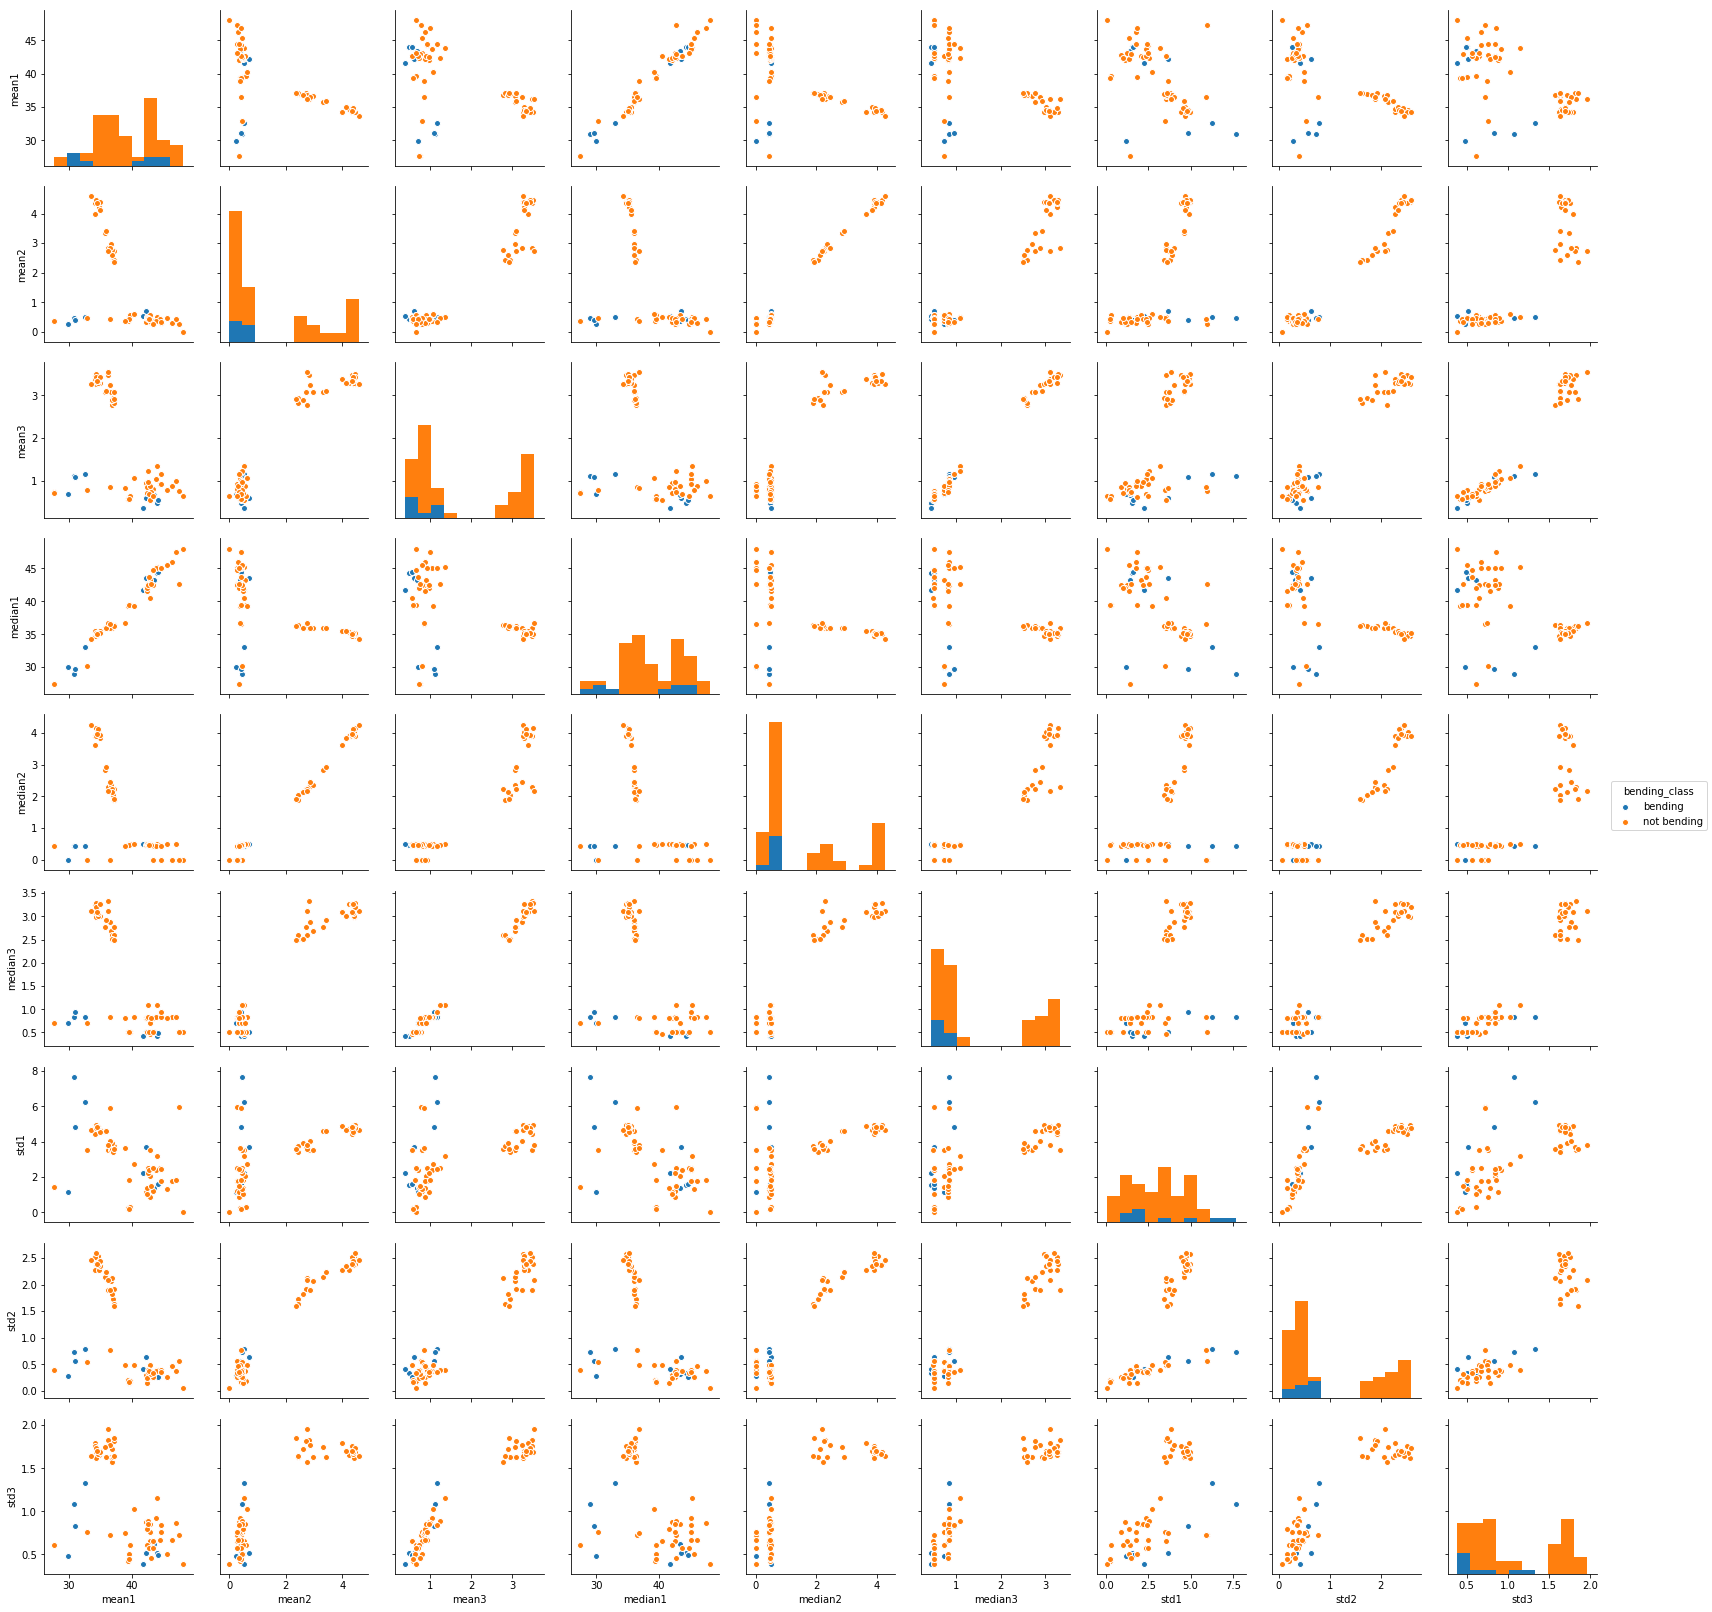

In [254]:
#select mean1,median1,std1...from the table and add bending or not label to it(3,4,5,10,11,12,38,39,40)
mean1 = []
median1 = []
std1 = []
mean2 = []
median2 = []
std2 = []
mean3 = []
median3 = []
std3 = []

#select train dataset
def get_train(count1,count2):
    for i in range(count1-1,count2,1):
        ins = f_list[i]
        mean1.append(ins[3])
        median1.append(ins[4])
        std1.append(ins[5]) 
    
        mean2.append(ins[10])
        median2.append(ins[11])
        std2.append(ins[12])
    
        mean3.append(ins[38])
        median3.append(ins[39])
        std3.append(ins[40])
get_train(3,7)
get_train(10,13)
get_train(17,28)
get_train(32,43)
get_train(48,59)
get_train(63,74)
get_train(78,88)

bending_class = []
for i in range(0,9,1):
    bending_class.append('bending')
for i in range(9,68,1):
    bending_class.append('not bending')
#print(bending_class)


#create a new dataframe contains all the information extracted above
train_df_126 = pd.DataFrame({'mean1':mean1, 'median1':median1, 'std1':std1,
                            'mean2':mean2, 'median2':median2, 'std2':std2,
                            'mean3':mean3, 'median3':median3, 'std3':std3, 'bending_class':bending_class})
#print(train_df_126)
sns.pairplot(train_df_126, kind="scatter", hue = 'bending_class')
plt.show()

##### &nbsp;  ii Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, you have 12 time series for each instance. Repeat the experiment in 1(d)i. Do you see any considerable difference in the results with those of 1(d)i?

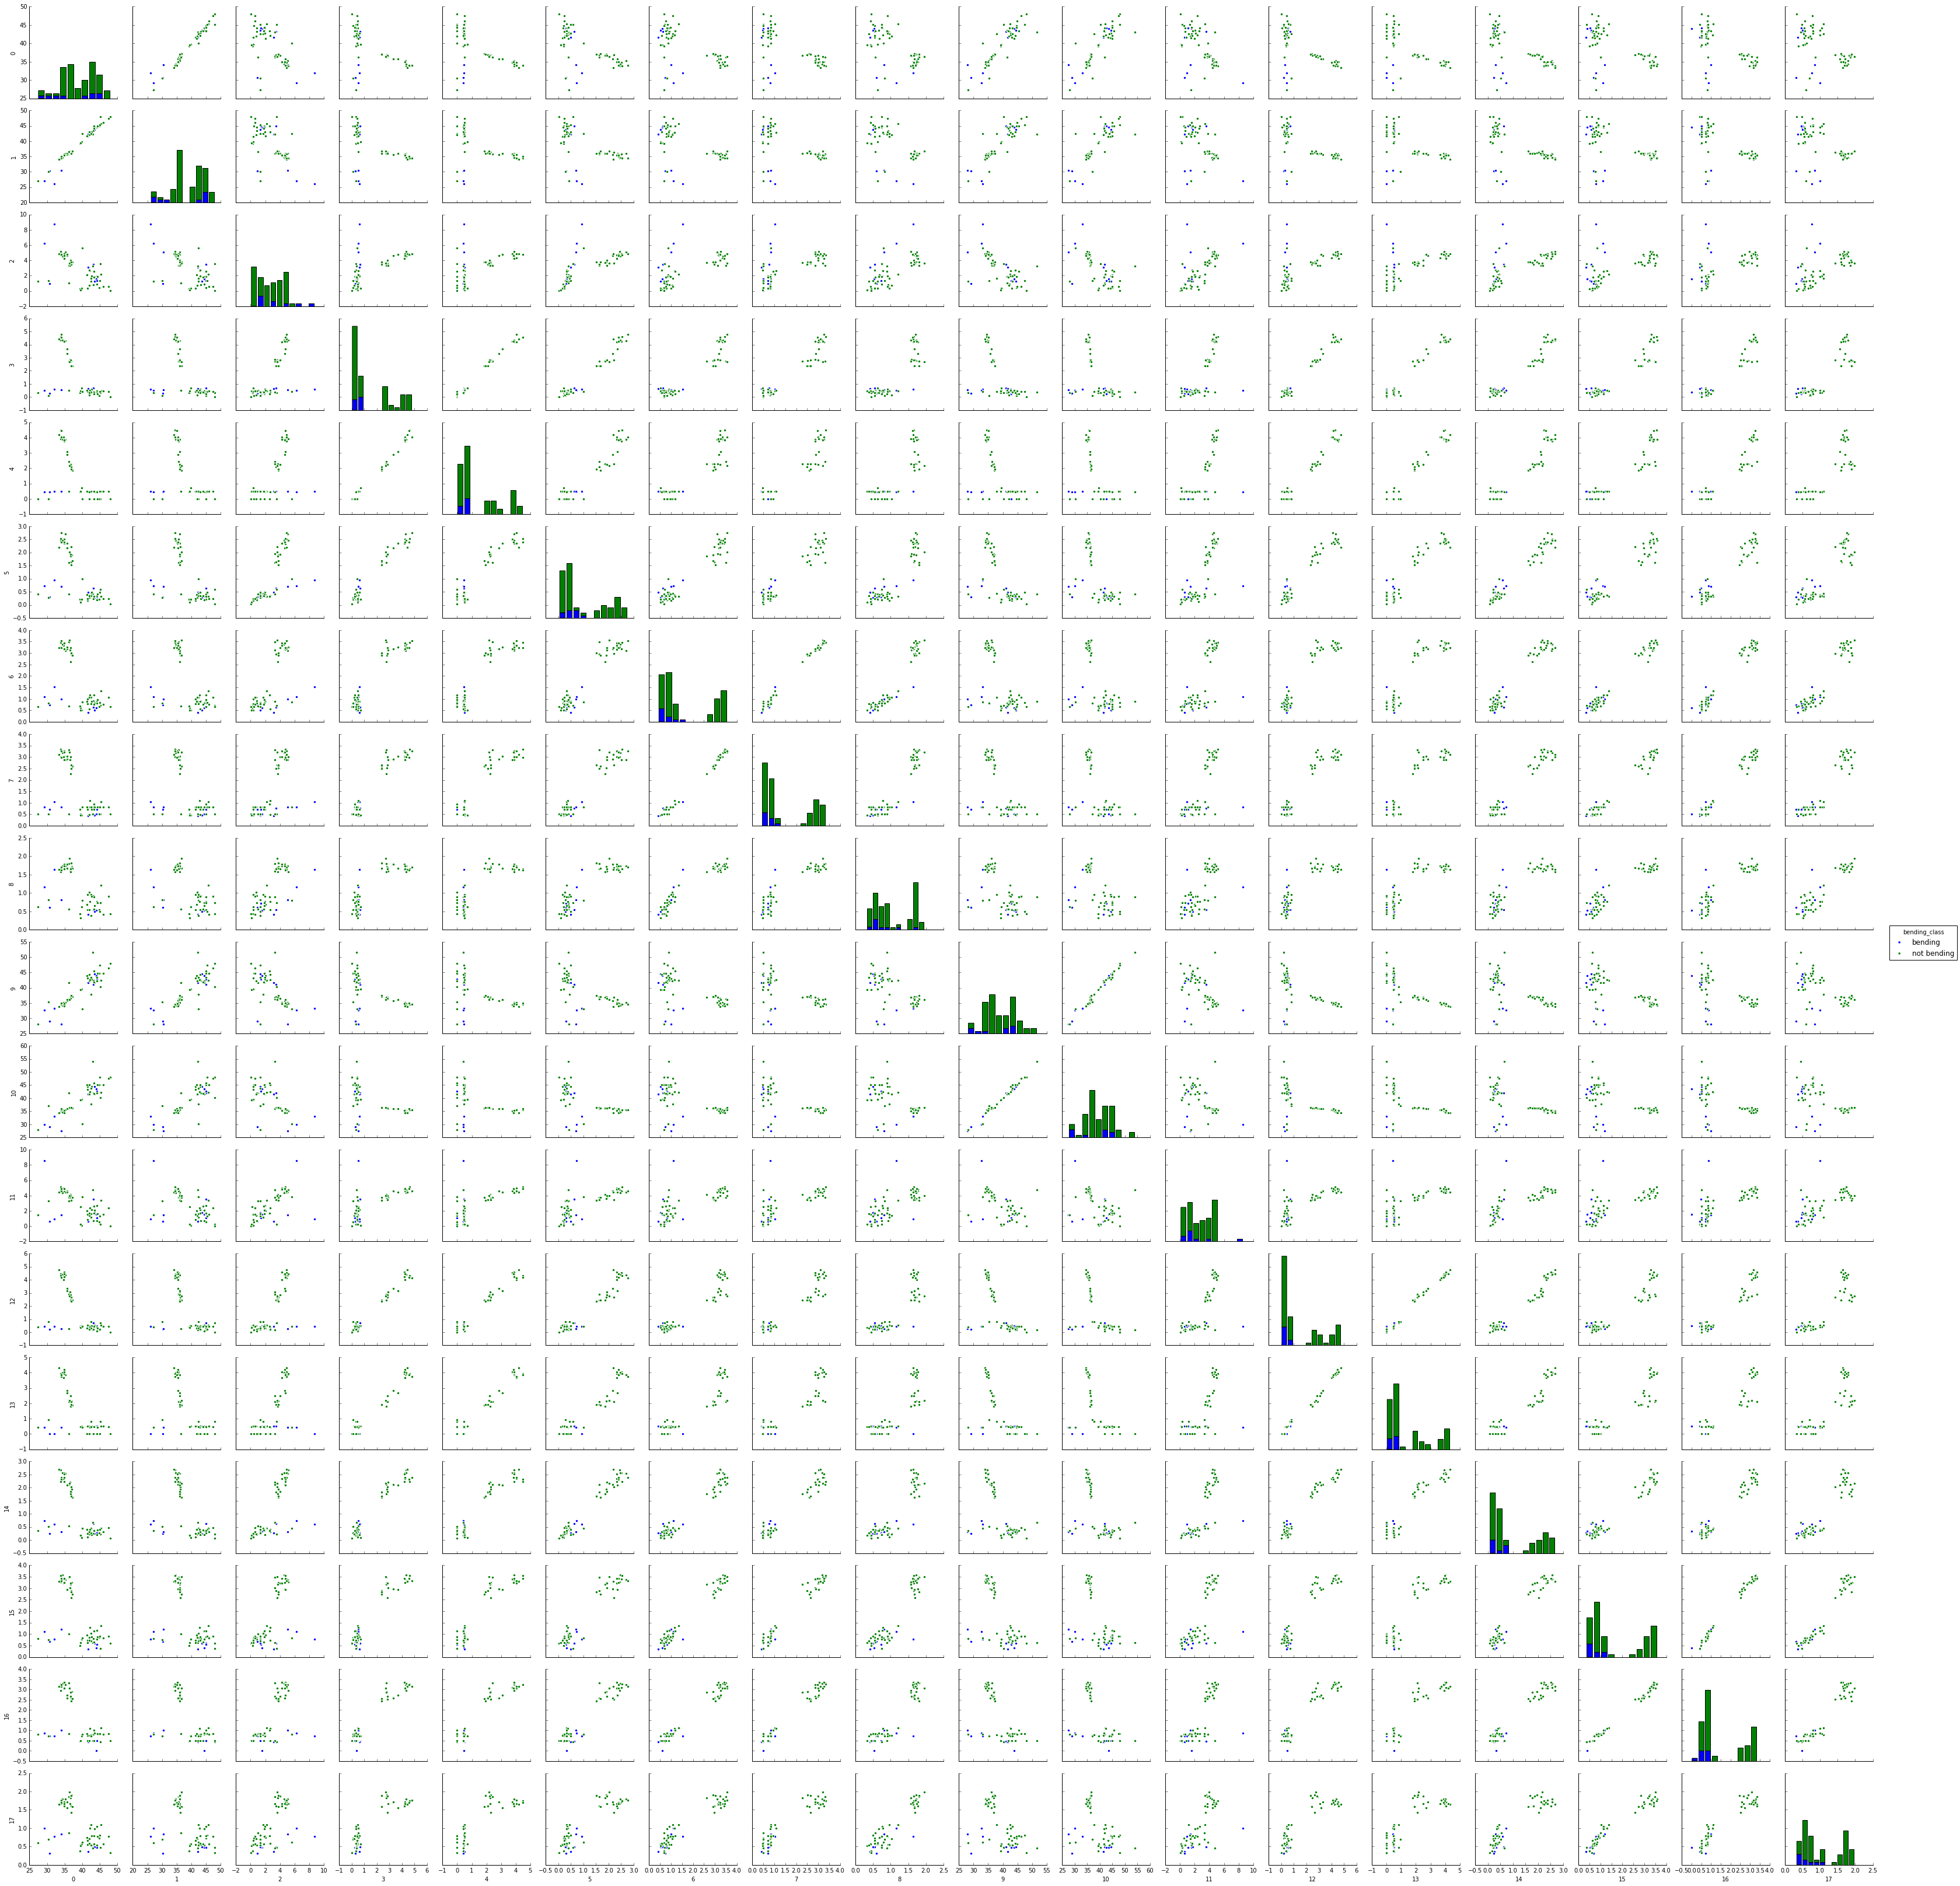

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from astropy.table import Table
import os
filename_list = ['bending1','bending2','cycling','lying','sitting','standing','walking']

#select mean, median, std to do all the calculate
def get_var_features_d2(df,varname):
    features_list = list()
    mean_v = round(df[varname].mean(),2)
    median_v = round(df[varname].median(),2)
    std_v = round(df[varname].std(),2)
    features_list.extend((mean_v,median_v,std_v))
    return features_list

#select 1,2,6 features
def get_126features(name,l):
    df = pd.read_csv(name, sep = ',', header = 4)
    df1 = df.drop(columns = '# Columns: time')
    features_list = list()
    df_126 = pd.DataFrame()
    
    for j in range(0,l,1):
        sdf = df1.iloc[j*round(480/l):(j+1)*round(480/l)]
        sdf.columns = [j*6+1,j*6+2,j*6+3,j*6+4,j*6+5,j*6+6]
        sdf.index = range(len(sdf))
        df_126 = pd.concat( [df_126, sdf], axis=1,ignore_index=False)
        
    var_name126 = []
    for n in range(0,l,1):
        var_name126.append(n*6+1)
        var_name126.append(n*6+2)
        var_name126.append(n*6+6)
      
    for i in var_name126:
        list_1 = get_var_features_d2(df_126,i)
        features_list += list_1
    features = list()
    features.append(features_list)
    return features

#load data files
def get_all126(filename,count1,count2,l):
    os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    file_fea = list()
    b = os.listdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    if '.ipynb_checkpoints'in b:
        b.remove('.ipynb_checkpoints')
   
    for i in range(count1,count2+1,1):
        a = get_126features('dataset%d.csv' %i, l)
        file_fea.append(a[0])
    return file_fea



d2 = []
bending1_126_d2 = get_all126('bending1',3,7,2)
for i in range(len(bending1_126_d2)):
    d2.append(bending1_126_d2[i])
    bending2_126_d2 = get_all126('bending2',3,6,2)
for i in range(len(bending2_126_d2)):
    d2.append(bending2_126_d2[i])
cycling_126_d2 = get_all126('cycling',4,15,2)
for i in range(len(cycling_126_d2)):
    d2.append(cycling_126_d2[i])
lying_126_d2 = get_all126('lying',4,15,2)
for i in range(len(lying_126_d2)):
    d2.append(lying_126_d2[i])
sitting_126_d2 = get_all126('sitting',4,15,2)
for i in range(len(sitting_126_d2)):
    d2.append(sitting_126_d2[i])
standing_126_d2 = get_all126('standing',4,15,2)
for i in range(len(standing_126_d2)):
    d2.append(standing_126_d2[i])
walking_126_d2 = get_all126('walking',4,15,2)
for i in range(len(walking_126_d2)):
    d2.append(walking_126_d2[i])

df_d2 = pd.DataFrame(d2)

bending_classd2 = []
for i in range(0,9,1):
    bending_classd2.append('bending')
for i in range(9,69,1):
    bending_classd2.append('not bending')

df_d2['bending_class'] = bending_classd2
sns.pairplot(df_d2, kind="scatter", hue = 'bending_class')
plt.show()


As features doubled, we can see there are more relationships seem to be closer to linear. And the classes seem to be more separatly. Not only add useless features, each features seem to be useful according to the plot.

##### &nbsp;  iii Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression4 to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features.5 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to de- termine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem.6 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from astropy.table import Table
import os
filename_list = ['bending1','bending2','cycling','lying','sitting','standing','walking']

#set train data and test data by 'l'

def get_var_features_d3(df,varname):
    features_list = list()
    mean_d3 = round(df[varname].mean(),2)
    median_d3 = round(df[varname].median(),2)
    std_d3 = round(df[varname].std(),2)
    features_list.extend((mean_d3,median_d3,std_d3))
    return features_list
def get_features_d3(name,l):
    df = pd.read_csv(name, sep = ',', header = 4)
    df1 = df.drop(columns = '# Columns: time')
    df2 = df1.drop(columns = 'avg_rss13')
    df3 = df2.drop(columns = 'var_rss13')
    df4 = df3.drop(columns = 'avg_rss23')
    
    features_list = list()
    df_d3 = pd.DataFrame()
    for j in range(0,l,1):
        sdf = df4.iloc[j*round(480/l):(j+1)*round(480/l)]
        sdf.columns = [j*3+1,j*3+2,j*3+3]
        sdf.index = range(len(sdf))
        df_d3 = pd.concat( [df_d3, sdf], axis=1,ignore_index=False)
    for i in range(1,3*l+1,1):       
        list_1 = get_var_features_d3(df_d3,i)
        features_list += list_1
    features = list()
    features.append(features_list)
    return features


def get_all_d3(filename,count1,count2,l):
    os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    file_fea = list()
    b = os.listdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    if '.ipynb_checkpoints'in b:
        b.remove('.ipynb_checkpoints')
   
    for i in range(count1,count2+1,1):
        a = get_features_d3('dataset%d.csv' %i, l)
        file_fea.append(a[0])
    return file_fea


#get train dataset
def traindata_d3(l):    
    d3 = []
    bending1_train_d3 = get_all_d3('bending1',3,7,l)
    bending2_train_d3 = get_all_d3('bending2',3,6,l)
    cycling_train_d3 = get_all_d3('cycling',4,15,l)
    lying_train_d3 = get_all_d3('lying',4,15,l)
    sitting_train_d3 = get_all_d3('sitting',4,15,l)
    standing_train_d3 = get_all_d3('standing',4,15,l)
    walking_train_d3 = get_all_d3('walking',4,15,l)
    d3 = bending1_train_d3+bending2_train_d3+cycling_train_d3+lying_train_d3+sitting_train_d3+standing_train_d3+walking_train_d3
    df_d3_2 = pd.DataFrame(d3)
#print(df_d3_2.shape)
    bending_classd3 = []
    for i in range(0,9,1):
        bending_classd3.append('bending')
    for i in range(9,69,1):
        bending_classd3.append('not bending')
    df_d3_2['bending_class'] = bending_classd3
    return df_d3_2

#get test dataset
def testdata_d3(l):    
    d3 = []
    bending1_train_d3 = get_all_d3('bending1',1,2,l)
    bending2_train_d3 = get_all_d3('bending2',1,2,l)
    cycling_train_d3 = get_all_d3('cycling',1,3,l)
    lying_train_d3 = get_all_d3('lying',1,3,l)
    sitting_train_d3 = get_all_d3('sitting',1,3,l)
    standing_train_d3 = get_all_d3('standing',1,3,l)
    walking_train_d3 = get_all_d3('walking',1,3,l)
    d3 = bending1_train_d3+bending2_train_d3+cycling_train_d3+lying_train_d3+sitting_train_d3+standing_train_d3+walking_train_d3
    df_d3_2 = pd.DataFrame(d3)
 
    bending_classd3 = []
    for i in range(0,4,1):
        bending_classd3.append('bending')
    for i in range(4,19,1):
        bending_classd3.append('not bending')
    df_d3_2['bending_class'] = bending_classd3
    return df_d3_2

#check the shape when l =2
a  = traindata_d3(2)
b = testdata_d3(2)
print(a.shape)
print(b.shape)

(69, 19)
(19, 19)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


#set StratifiedKFold instead of cv
kf = StratifiedKFold(n_splits=5,random_state=None, shuffle=False)

score_max = []
def get_score(l):
    score_list = []
    number_list = []
    #get traindata and testdata
    a = traindata_d3(l)
    b = testdata_d3(l)
    train_x = a[list(range(9*l))]
    train_y = a['bending_class']
    test_x = b[list(range(9*l))]
    test_y = b['bending_class']
    

    count = 0
    range_list = []
    rfecvscore = []
    k_list = [1,2,3,4,5]
    #do k folders to split dataset
    for train_index, test_index in kf.split(train_x,train_y):
        count+=1
        
        #select out traindata and testdata of different k
        train_x_r = pd.DataFrame(train_x.iloc[train_index])
        train_y_r =pd.DataFrame(train_y.iloc[train_index])
        test_x_r = pd.DataFrame(train_x.iloc[test_index])
        test_y_r = pd.DataFrame(train_y.iloc[test_index])
        
        #use logistic regression, set c to 10000(infinite)
        lg = LogisticRegression(C=10000)
        #use rfecv to do features selection
        rfecv = RFECV(lg,cv=StratifiedKFold(5))
        rfecv.fit(train_x_r, train_y_r)
        number = rfecv.n_features_ 
        
        #put the optimal # of features into rfe model
        rfe = RFE(lg, number)
        rfe.fit(train_x_r, train_y_r)
        #transform the optimal traindata and testdata
        trainx_op_features = pd.DataFrame(rfe.transform(train_x_r))
        testx_op_features = pd.DataFrame(rfe.transform(test_x_r))
        
        
        lg_new = LogisticRegression(C=10000)
        #put optimal traindata back to a new logistic regression model to train
        lg_new.fit(trainx_op_features,train_y_r)
        score_model = lg_new.score(testx_op_features,test_y_r)
        #use a list to store the scores of model
        score_list.append(score_model)
        #also use a list to store optimal number
        number_list.append(number)
        
        
       
    v = score_list.index(max(score_list))
    #choose the best score of each l
    model_score_max = score_list[v]
    k_op = k_list[v]
    number_op = number_list[v]
    return number_op,k_op,model_score_max
  
k_op_list = []    
number_op_list = []
model_score_list = []
for i in range(1,21,1):
    number_op,k_op,model_score = get_score(i)
    #select the best l
    number_op_list.append(number_op)
    k_op_list.append(k_op)
    model_score_list.append(model_score)
print(number_op_list)
print(k_op_list)
print(model_score_list)

[1, 2, 1, 22, 11, 53, 8, 1, 7, 9, 63, 22, 116, 13, 50, 17, 17, 162, 25, 22]
[5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 5, 5, 5, 5, 5]
[0.9230769230769231, 1.0, 0.9285714285714286, 0.9285714285714286, 0.9230769230769231, 1.0, 1.0, 0.9285714285714286, 1.0, 1.0, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 1.0, 0.9285714285714286, 1.0, 1.0, 1.0, 1.0, 1.0]


In [23]:
#Choose the best l and select the best features in l
best_l = model_score_list.index(max(model_score_list))+1
best_num = number_op_list[best_l-1]
print('The best l is:')
print(best_l)
print('The best features number is:')
print(best_num)

The best l is:
2
The best features number is:
2


##### &nbsp;  iiii Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [35]:
from sklearn.metrics import confusion_matrix 
#get the best features when l is 2(best)
c = traindata_d3(best_l)
d = testdata_d3(best_l)
train_x_2 = c[list(range(9*best_l))]
train_y_2 = c['bending_class']
test_x_2 = d[list(range(9*best_l))]
test_y_2 = d['bending_class']
ranking_list = []
count = 0
for train_index, test_index in kf.split(train_x_2,train_y_2):
    count+=1
    #print(count)
    train_x_r2 = train_x_2.iloc[train_index]
    train_y_r2 = train_y_2.iloc[train_index]
    test_x_r2 = train_x_2.iloc[test_index]
    test_y_r2 = train_y_2.iloc[test_index]
    lg = LogisticRegression(C = 10000)
    
    
    rfe = RFE(lg, best_num)
    rfe.fit(train_x_r2, train_y_r2)
    #print(train_x_r)
    trainx_2_features = pd.DataFrame(rfe.transform(train_x_r2))
    #print(trainx_2_features)
    testx_2_features = pd.DataFrame(rfe.transform(test_x_r2))
    #print(testx_2_features)   
    if count == 1:
        ranking_op = rfe.ranking_
    
print(ranking_op)
count_r = 0
features_2_list = []
for i in ranking_op:
    print(i)
    if i == 1:
        features_2_list.append(count_r)
    count_r= count_r+1
print(features_2_list)


[ 7  8 16 13  5  1  6 15 11 17 12 14  2  4  3 10  9  1]
7
8
16
13
5
1
6
15
11
17
12
14
2
4
3
10
9
1
[5, 17]


In [44]:
#select the best traindata according to the best features list
train_x_best = c[features_2_list]
train_y_best = c['bending_class']


In [41]:
#calculate confusion matrix
lg_f_1 = LogisticRegression(C = 10000).fit(train_x_best, train_y_best)

pre_result=lg_f_1.predict(train_x_best)
print(pre_result)
tn, fp, fn, tp = confusion_matrix(pre_result,train_y_best).ravel()#get the number of tn fp fn tp
print ('tn:'+str(tn))
print ('fp:'+str(fp))
print ('fn:'+str(fn))
print ('tp:'+str(tp))
#confusion matrix
print(confusion_matrix(pre_result,train_y_best))




[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
tn:59
fp:7
fn:1
tp:2
[[59  7]
 [ 1  2]]


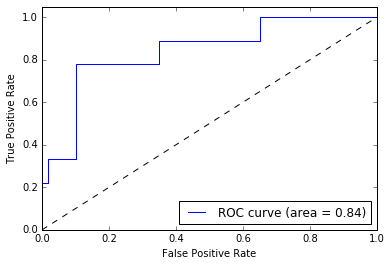

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

#convert predict result into dataframe
pre_df = pd.DataFrame(pre_result, index=range(69))

#replace class into numbers
train_y_best.replace('bending', 1, inplace = True)
train_y_best.replace('not bending', 0, inplace = True)
pre_df.replace('bending', 1, inplace = True)
pre_df.replace('not bending', 0, inplace = True)

#calculate y_scores by decision_function
y_scores=lg_f_1.decision_function(train_x_best)

#fpr, tpr, thresholds to store data calculated by roc_curve
fpr,tpr,thresholds=roc_curve(train_y_best,y_scores)
plt.figure()
logit = auc(fpr, tpr)

#plot
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%logit)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [48]:
import statsmodels.api as sm
#print pvalues and coefs
sm_git_d4 = sm.Logit(train_y_best,train_x_best)
sm_git_d4_result = sm_git_d4.fit()
print(sm_git_d4_result.summary2())

Optimization terminated successfully.
         Current function value: 0.308342
         Iterations 7
                        Results: Logit
Model:              Logit            No. Iterations:   7.0000 
Dependent Variable: bending_class    Pseudo R-squared: 0.204  
Date:               2018-10-04 15:02 AIC:              46.5512
No. Observations:   69               BIC:              51.0194
Df Model:           1                Log-Likelihood:   -21.276
Df Residuals:       67               LL-Null:          -26.718
Converged:          1.0000           Scale:            1.0000 
----------------------------------------------------------------
        Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
----------------------------------------------------------------
5       1.4457     1.0460    1.3821   0.1669   -0.6044    3.4958
17     -3.8087     1.2177   -3.1279   0.0018   -6.1953   -1.4221



##### &nbsp;  v Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [51]:
#show train accuracy and test accuracy
test_x_best = d[features_2_list]
test_y_best = d['bending_class']
test_y_best.replace('bending', 1, inplace = True)
test_y_best.replace('not bending', 0, inplace = True)
pre_result_test = lg_f_1.predict(test_x_best)
train_accuracy = lg_f_1.score(train_x_best,train_y_best)
test_accuracy = lg_f_1.score(test_x_best,test_y_best)
print(train_accuracy)
print(test_accuracy)

0.8840579710144928
0.7894736842105263


##### &nbsp;  vi Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

No, they seem to be not well-separated.

##### &nbsp;  vii From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

From the confusion matrices, we know that there are imbalanced classes.

In [69]:
from imblearn.over_sampling import SMOTE

#use SMOTE function to adjust the data 
print(test_x_best.shape)
print(train_x_best.shape)
print(train_y_best.shape)
print(test_y_best.shape)
smo1 = SMOTE(k_neighbors =2)
smo2 = SMOTE(k_neighbors =2)
train_x_res, train_y_res = smo1.fit_sample(train_x_best, train_y_best)
test_x_res, test_y_res = smo2.fit_sample(test_x_best, test_y_best)



(19, 2)
(69, 2)
(69,)
(19,)


In [70]:
#show the confusion matrix after SMOTE
lg_d7 = LogisticRegression(C = 10000).fit(train_x_res, train_y_res)

result_d7=lg_d7.predict(train_x_res)
print(result_d7)
tn_d7, fp_d7, fn_d7, tp_d7 = confusion_matrix(result_d7,train_y_res).ravel()#get the number of tn fp fn tp
print ('tn:'+str(tn_d7))
print ('fp:'+str(fp_d7))
print ('fn:'+str(fn_d7))
print ('tp:'+str(tp_d7))
#confusion matrix
print(confusion_matrix(result_d7,train_y_res))


[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1]
tn:41
fp:11
fn:19
tp:49
[[41 11]
 [19 49]]


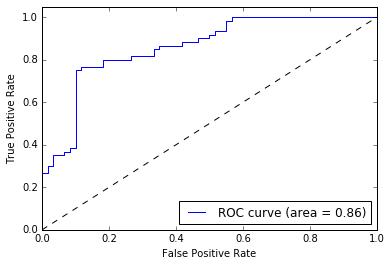

In [75]:
y_scores_d7=lg_d7.decision_function(train_x_res)

fpr_d7,tpr_d7,thresholds_d7=roc_curve(train_y_res,y_scores_d7)
plt.figure()


logit_d7 = auc(fpr_d7, tpr_d7)

plt.plot(fpr_d7,tpr_d7,label='ROC curve (area = %0.2f)'%logit_d7)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#####  (e) Binary Classification Using L1-penalized logistic regression
##### &nbsp; i. Repeat 1(d)iii using L1-penalized logistic regression,7 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [16]:
from sklearn.linear_model import LogisticRegressionCV
def l1_score(l):
    score_list = []
    number_list = []
    
    a = traindata_d3(l)
    b = testdata_d3(l)
    train_x = a[list(range(9*l))]
    train_y = a['bending_class']
    test_x = b[list(range(9*l))]
    test_y = b['bending_class']
    
    #change to L1-penalized logistic regression
    lg_l1 = LogisticRegressionCV(penalty = 'l1',cv = 5, solver = 'liblinear',multi_class = 'ovr',Cs = 10,scoring = 'accuracy')
    lg_l1.fit(train_x,train_y)
    return lg_l1.score(train_x,train_y)
    
    
    
list_l1_score = []    
for i in range(1,21,1):
    list_l1_score.append(l1_score(i))
print(list_l1_score)
print('The best l is:')
best_l1 = list_l1_score.index(max(list_l1_score))+1
print(best_l1)

[0.8695652173913043, 0.927536231884058, 0.927536231884058, 0.8695652173913043, 0.9710144927536232, 1.0, 0.9855072463768116, 1.0, 0.9855072463768116, 0.9855072463768116, 1.0, 0.9855072463768116, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
The best l is:
6


#### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

Because we predict both models on train data and data has imbalanced classes and traindata is not enough. So actuall both models performs well. From the score and best l we can see that diii has many l with score = 1, and in l1_penalized it also has many l with score = 1. However, I think L1-penalized is better to implement. It save the step to calculate p-values and drop features. 

#### (f) Multi-class Classification (The Realistic Case)

#### i. Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.9 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.10

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from astropy.table import Table
import os
def get_var_features_f(df,varname):
    features_list = list()
    mean_f = round(df[varname].mean(),2)
    median_f = round(df[varname].median(),2)
    std_f = round(df[varname].std(),2)
    features_list.extend((mean_f,median_f,std_f))
    return features_list
def get_features_f(name,l):
    df = pd.read_csv(name, sep = ',', header = 4)
    df1 = df.drop(columns = '# Columns: time')
    df2 = df1.drop(columns = 'avg_rss13')
    df3 = df2.drop(columns = 'var_rss13')
    df4 = df3.drop(columns = 'avg_rss23')
    
    features_list = list()
    df_f = pd.DataFrame()
    for j in range(0,l,1):
        sdf = df4.iloc[j*round(480/l):(j+1)*round(480/l)]
        #column names
        sdf.columns = [j*3+1,j*3+2,j*3+3]
        sdf.index = range(len(sdf))
        
        df_f = pd.concat( [df_f, sdf], axis=1,ignore_index=False)
    for i in range(1,3*l+1,1):
        #print(i)
        #print(df_d3)
        list_1 = get_var_features_f(df_f,i)
        #print(list_1)
        features_list += list_1
    #print('stop')
    features = list()
    features.append(features_list)
    return features


def get_all_f(filename,count1,count2,l):
    os.chdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    file_fea = list()
    b = os.listdir('/Users/yuxinliu/INF552_Homework_yuxinliu/Hw3/%s' % filename)
    if '.ipynb_checkpoints'in b:
        b.remove('.ipynb_checkpoints')
   
    for i in range(count1,count2+1,1):
        #print('dataset%d.csv' %i)
        a = get_features_f('dataset%d.csv' %i, l)
        #print(a)
        #print('dataset%d.csv' %i,l)
        file_fea.append(a[0])
    return file_fea


#for l in range(1,21,1):
def traindata_f(l):    
    f = []
    bending1_train_f = get_all_f('bending1',3,7,l)
    bending2_train_f = get_all_f('bending2',3,6,l)
    cycling_train_f = get_all_f('cycling',4,15,l)
    lying_train_f = get_all_f('lying',4,15,l)
    sitting_train_f = get_all_f('sitting',4,15,l)
    standing_train_f = get_all_f('standing',4,15,l)
    walking_train_f = get_all_f('walking',4,15,l)
    f = bending1_train_f+bending2_train_f+cycling_train_f+lying_train_f+sitting_train_f+standing_train_f+walking_train_f
    df_f_2 = pd.DataFrame(f)

    #create class column 
    bending_classf = []
    for i in range(0,5,1):
        bending_classf.append('bending1')
    for i in range(5,9,1):
        bending_classf.append('bending2')
    for i in range(9,21,1):
        bending_classf.append('cycling')
    for i in range(21,33,1):
        bending_classf.append('lying')
    for i in range(33,45,1):
        bending_classf.append('sitting')
    for i in range(45,57,1):
        bending_classf.append('standing')
    for i in range(57,69,1):
        bending_classf.append('walking')
    df_f_2['bending_class'] = bending_classf
    return df_f_2

def testdata_f(l):    
    f = []
    bending1_train_f = get_all_f('bending1',1,2,l)
    bending2_train_f = get_all_f('bending2',1,2,l)
    cycling_train_f = get_all_f('cycling',1,3,l)
    lying_train_f = get_all_f('lying',1,3,l)
    sitting_train_f = get_all_f('sitting',1,3,l)
    standing_train_f = get_all_f('standing',1,3,l)
    walking_train_f = get_all_f('walking',1,3,l)
    f = bending1_train_f+bending2_train_f+cycling_train_f+lying_train_f+sitting_train_f+standing_train_f+walking_train_f
    df_f_2 = pd.DataFrame(f)

    bending_classf = []
    for i in range(0,2,1):
        bending_classf.append('bending1')
    for i in range(2,4,1):
        bending_classf.append('bending2')
    for i in range(4,7,1):
        bending_classf.append('cycling')
    for i in range(7,10,1):
        bending_classf.append('lying')
    for i in range(10,13,1):
        bending_classf.append('sitting')
    for i in range(13,16,1):
        bending_classf.append('standing')
    for i in range(16,19,1):
        bending_classf.append('walking')
    df_f_2['bending_class'] = bending_classf
    return df_f_2

m  = traindata_f(2)
n = testdata_f(2)
print(m.shape)
print(n.shape)

(69, 19)
(19, 19)


In [40]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
def f_score(l):
    score_list = []
    number_list = []
    #get train data and test data    
    a = traindata_f(l)
    b = testdata_f(l)
    train_x = a[list(range(9*l))]
    train_y = a['bending_class']
    test_x = b[list(range(9*l))]
    test_y = b['bending_class']
    #use p1-penalty and multicalss model
    lg_f = LogisticRegressionCV(penalty = 'l1',cv=StratifiedKFold(5), solver = 'saga',multi_class = 'multinomial',scoring = 'accuracy')
    lg_f.fit(train_x,train_y)
    
    c = lg_f.score(test_x,test_y)
    
    return c


f_score_list = []
for i in range(1,21,1):
    f_score_list.append(1-f_score(i))
    
#campare the scores and select the best l    
print(f_score_list)   
print('The best l is:')
best_f = f_score_list.index(min(f_score_list))+1
print(best_f)


[0.42105263157894735, 0.4736842105263158, 0.4736842105263158, 0.368421052631579, 0.4736842105263158, 0.4736842105263158, 0.368421052631579, 0.4736842105263158, 0.42105263157894735, 0.368421052631579, 0.4736842105263158, 0.368421052631579, 0.368421052631579, 0.42105263157894735, 0.368421052631579, 0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.4736842105263158, 0.368421052631579]
The best l is:
4


In [35]:
from sklearn.metrics import confusion_matrix 
a = traindata_f(4)
b = testdata_f(4)
train_x = a[list(range(9*4))]
train_y = a['bending_class']
test_x = b[list(range(9*4))]
test_y = b['bending_class']
    
train_y.replace('bending1', 1, inplace = True)
train_y.replace('bending2', 2, inplace = True)
train_y.replace('cycling', 3, inplace = True)
train_y.replace('lying', 4, inplace = True)
train_y.replace('sitting', 5, inplace = True)
train_y.replace('standing', 6, inplace = True)
train_y.replace('walking', 7, inplace = True)
    
lg_f1 = LogisticRegressionCV(penalty = 'l1',cv=StratifiedKFold(5), solver = 'saga',multi_class = 'multinomial',Cs = 10,scoring = 'accuracy',max_iter = 4)
lg_f1.fit(train_x,train_y)
pre_result_f1 = lg_f1.predict(train_x)
#show the confusion matrix
confusion_matrix(pre_result_f1, train_y)

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  4,  1,  0],
       [ 3,  2,  0,  6,  8,  4,  0],
       [ 2,  1,  0,  2,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0, 12]])

From the confusion matrix of test data, we can know that the test error is 7.

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_scores=lg_f1.decision_function(train_x)

fp_rate= {}
tp_rate= {}
thresholds = {}
R_Auc= {}

#calulate the fp rate and tp rate by roc_curve
for i in range(0,7,1):
    fp_rate[i], tp_rate[i], thresholds[i]= roc_curve(train_y, y_scores[:,i],pos_label=i)
    R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    


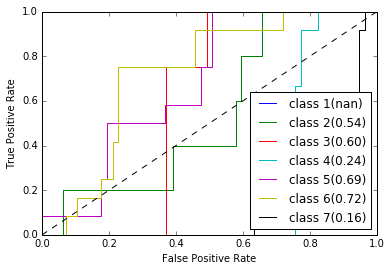

In [39]:
#plot
plt.figure()
fp_rate1 = fp_rate[0]
#print(fp_rate1)
plt.plot(fp_rate[0],tp_rate[0],label='class 1(%0.2f)'%R_Auc[0])
plt.plot(fp_rate[1],tp_rate[1],label='class 2(%0.2f)'%R_Auc[1])
plt.plot(fp_rate[2],tp_rate[2],label='class 3(%0.2f)'%R_Auc[2])
plt.plot(fp_rate[3],tp_rate[3],label='class 4(%0.2f)'%R_Auc[3])
plt.plot(fp_rate[4],tp_rate[4],label='class 5(%0.2f)'%R_Auc[4])
plt.plot(fp_rate[5],tp_rate[5],label='class 6(%0.2f)'%R_Auc[5])
plt.plot(fp_rate[6],tp_rate[6],label='class 7(%0.2f)'%R_Auc[6])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### ii Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

def f2_score(l):
    score_list = []
    number_list = []
    #load traindata
    a = traindata_f(l)
    b = testdata_f(l)
    train_x = a[list(range(9*l))]
    train_y = a['bending_class']
    test_x = b[list(range(9*l))]
    test_y = b['bending_class']
    
    #use GaussianNB model to select the best l
    GNB_classify=GaussianNB()
    GNB_classify.fit(train_x,train_y)
    c = GNB_classify.score(test_x,test_y)
    
    return c


f2_score_list = []
for i in range(1,21,1):
    f2_score_list.append(1-f2_score(i))
    
#select the best l   
print(f2_score_list)   
print('The best l is:')
best_f2 = f2_score_list.index(min(f2_score_list))+1
print(best_f2)
print('The test error of best l is:')
print(f2_score_list[best_f2-1]*69)

[0.26315789473684215, 0.26315789473684215, 0.21052631578947367, 0.1578947368421053, 0.368421052631579, 0.368421052631579, 0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.3157894736842105, 0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.3157894736842105, 0.368421052631579, 0.42105263157894735, 0.368421052631579, 0.368421052631579, 0.4736842105263158, 0.368421052631579]
The best l is:
4
The test error of best l is:
10.894736842105267


In [92]:
def f3_score(l):
    score_list = []
    number_list = []
    a = traindata_f(l)
    b = testdata_f(l)
    train_x = a[list(range(9*l))]
    train_y = a['bending_class']
    test_x = b[list(range(9*l))]
    test_y = b['bending_class']
    #use multinomialNB model to select the best l
    mnb=MultinomialNB()
    mnb.fit(train_x,train_y)
    c = mnb.score(test_x,test_y)
    
    return c


f3_score_list = []
for i in range(1,21,1):
    f3_score_list.append(1-f3_score(i))
    
    
print(f3_score_list)   
print('The best l is:')
best_f3 = f3_score_list.index(min(f3_score_list))+1
print(best_f3)
#calulate the test error
print('The test error of best l is:')
print(f3_score_list[best_f3-1]*69)

[0.42105263157894735, 0.4736842105263158, 0.4736842105263158, 0.4736842105263158, 0.368421052631579, 0.42105263157894735, 0.368421052631579, 0.42105263157894735, 0.42105263157894735, 0.3157894736842105, 0.368421052631579, 0.368421052631579, 0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.3157894736842105, 0.3157894736842105, 0.3157894736842105, 0.26315789473684215]
The best l is:
20
The test error of best l is:
18.15789473684211


#### iii. Which method is better for multi-class classification in this problem?

From the result of test error, we can see that GaussianNB is better, because it has less test error.

## 2. ISLR 3.7.4
####  I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.
#### &nbsp; (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
&nbsp; I think the RSS of cubic regression is smaller than that of linear regression. Because cubic regression is more flexible and is more likely to be overfitting.

#### &nbsp; (b) Answer (a) using test rather than training RSS.
&nbsp; The testing RSS of linear is smaller than cubic regression. Because the true relationship is linear, so the cubic regression will fit noise data more which will cause testing RSS to be larger.

#### &nbsp; (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
&nbsp; Since we have no idea about the true relationship, so I still think training RSS of cubic regression is smaller due to better flexibility. Cubic regression will fit the training data better.

#### &nbsp; (d) Answer (c) using test rather than training RSS.
&nbsp; It is hard to say which one is smaller. Because we still have no idea about the relationship. If the relationship is closer to cubic regression, the test RSS will be smaller. If the relationship is closer to linear, it will be larger.

## 2. ISLR 4.7.3
#### This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class- specific mean vector and a class specific covariance matrix. We con- sider the simple case where p = 1; i.e. there is only one feature.

#### Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, X ∼N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.

#### Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ12 = . . . = σK2 .
![image](4.7.3.pdf)
## If you can not see the pdf, please check the pdf named 4.7.3 from directory. Thank you!


## 3. ISLR 4.7.7
#### Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

#### Hint: Recall that the density function for a normal random variable is f(x) = √ 1 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.
![image](4.7.7.pdf)

## If you can not see the pdf, please check the pdf named 4.7.7 from directory. Thank you!